In [4]:
from pathlib import Path
import numpy as np
from pathlib import Path
import dill
import importlib
import src.mstmeclass as mc

In [5]:
preset = 2
match preset:
    case 0:
        output="output"
        region = "guadeloupe"
        N_subsample = 100
        rf = "h-east"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.9
    case 1:
        output="output"
        region = "guadeloupe"
        N_subsample = 100
        rf = "h-west"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.65
    case 2:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "h-east"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.9
    case 3:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "h-west"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.70
    case 4:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "none"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.70

# Region

# Cluster

In [37]:
path_out_condition = Path(
    f"J:/mstme/{output}/{region}/{rf}/GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%_100subsamples/"
)

# Pickle MSTME object for faster redraws
path_dill_condition = path_out_condition.joinpath(f"mstme_condition.dill")
if path_dill_condition.exists():
    with path_dill_condition.open("rb") as f:
        mstme_condition:mc.MSTME = dill.load(f)
        print(
            f"MSTME Dill found for {rf}, GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%!"
        )
# Pickle STM_ss object for faster redraws
path_dill_ss = path_out_condition.joinpath(f"mstme_ss_100_pool_200.dill")
if path_dill_ss.exists():
    with path_dill_ss.open("rb") as f:
        tm_MSTME_ss, stm_MSTME_ss = dill.load(f)
        print(
            f"STM_ss Dill found for {rf}, GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%!"
        )

MSTME Dill found for h-east, GP60%_CM90%!
STM_ss Dill found for h-east, GP60%_CM90%!


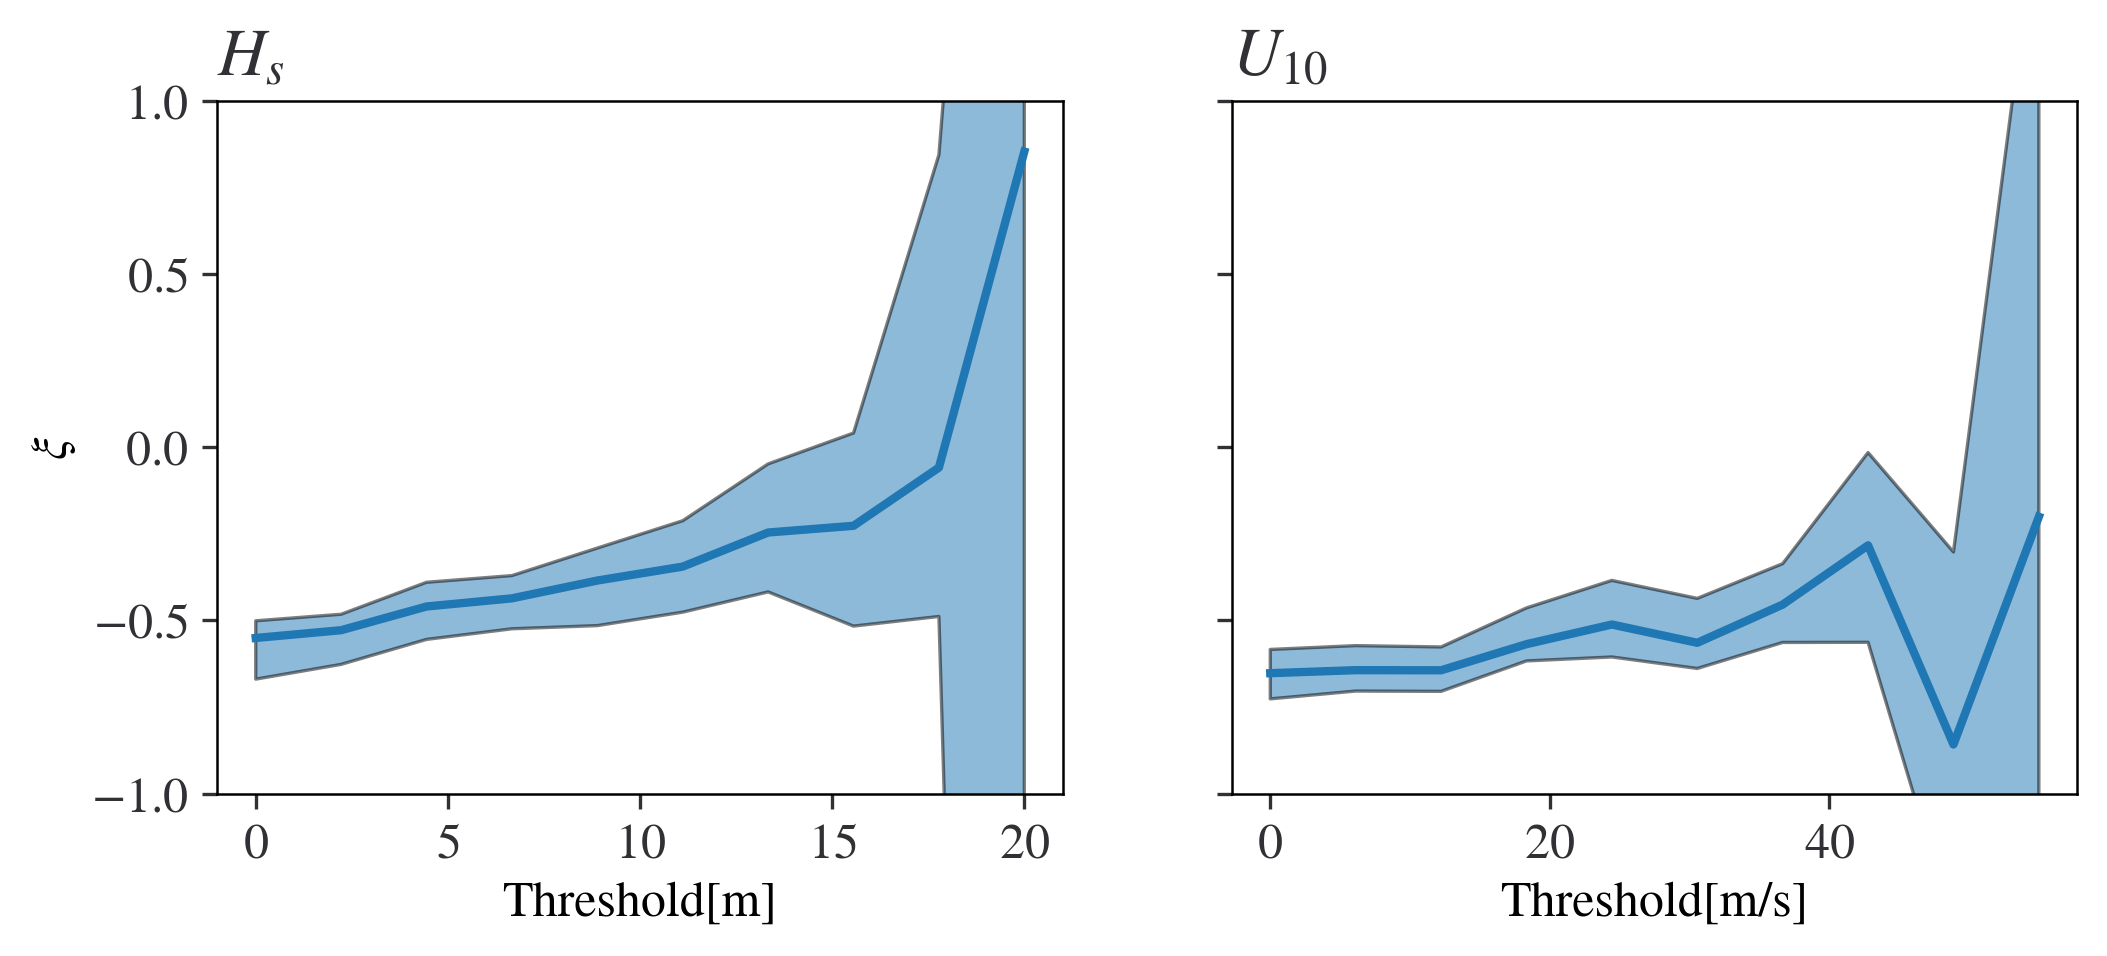

In [38]:
mstme_condition.search_marginal([0, 0], [20, 55])

In [33]:
importlib.reload(grapher)
grapher_condition = grapher.Grapher(mstme_condition)

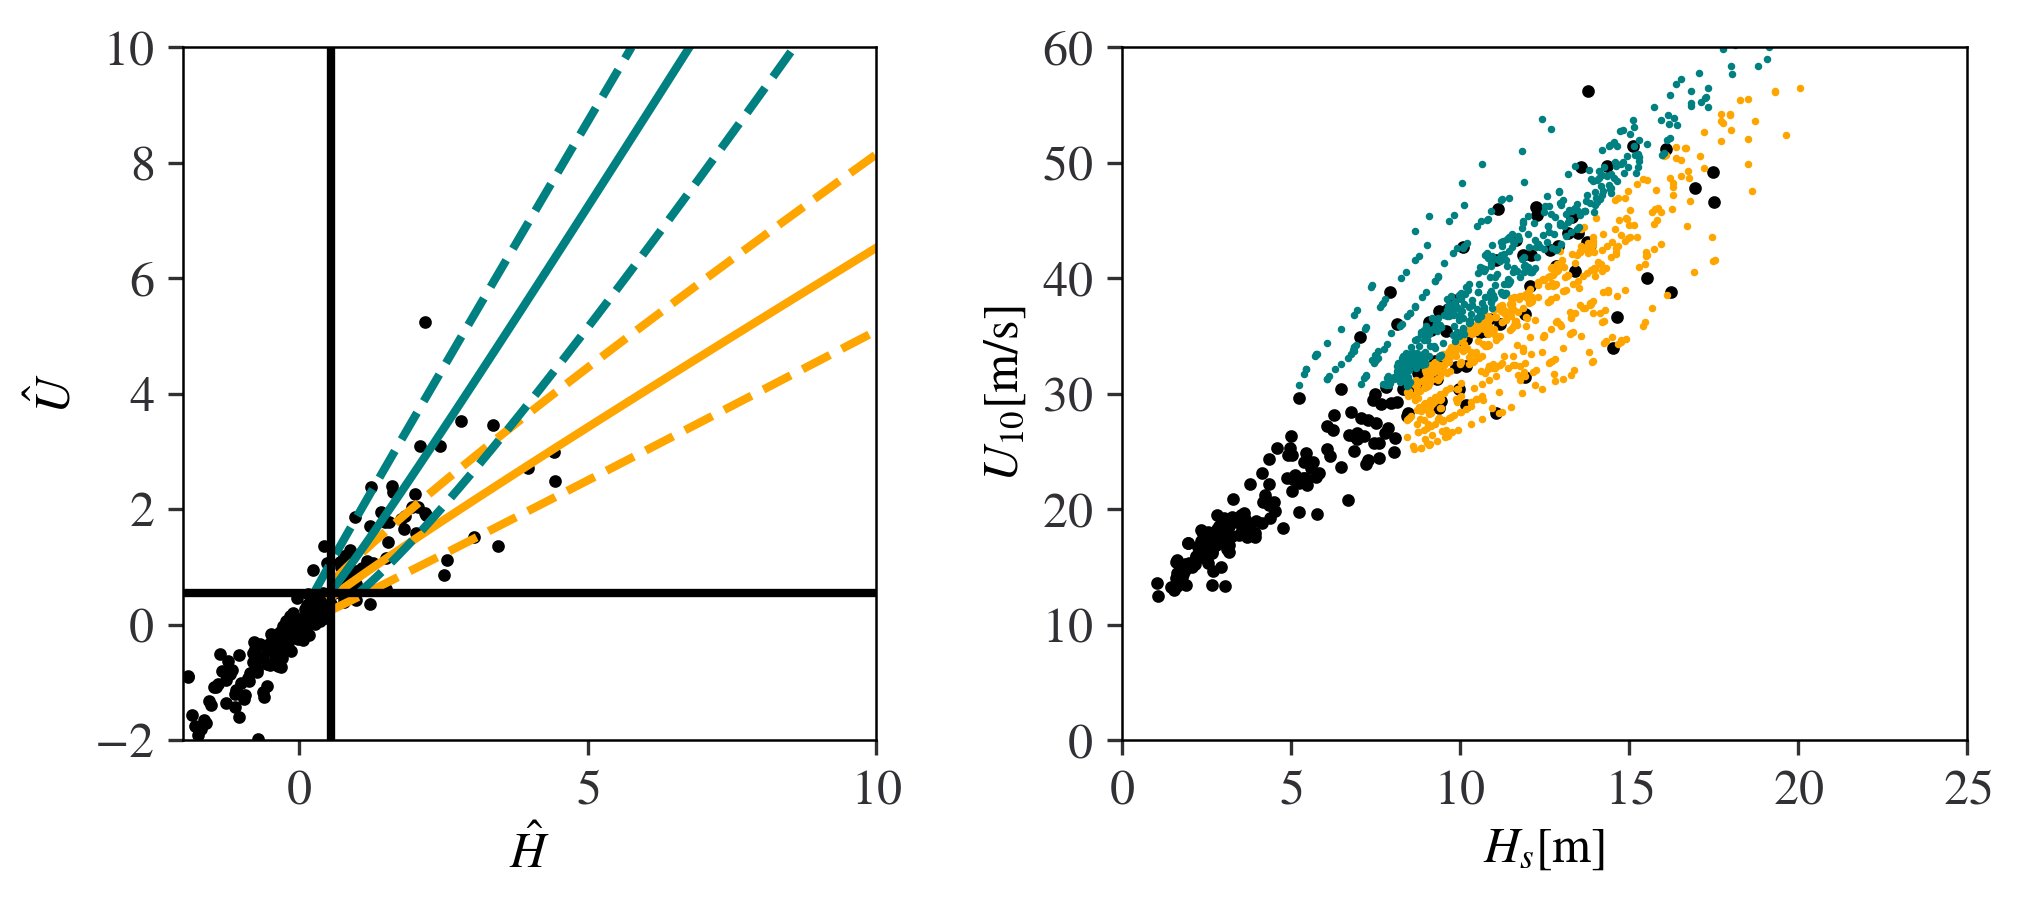

In [15]:
_ =grapher_condition.draw("Simulated_Conmul_vs_Back_Transformed_2",draw_fig=True)
# grapher_condition.draw("Simulated_Conmul_vs_Back_Transformed",draw_fig=True,dir_out=Path(fr"J:\mstme\output\guadeloupe-wide\{rf}\GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%_100subsamples"))

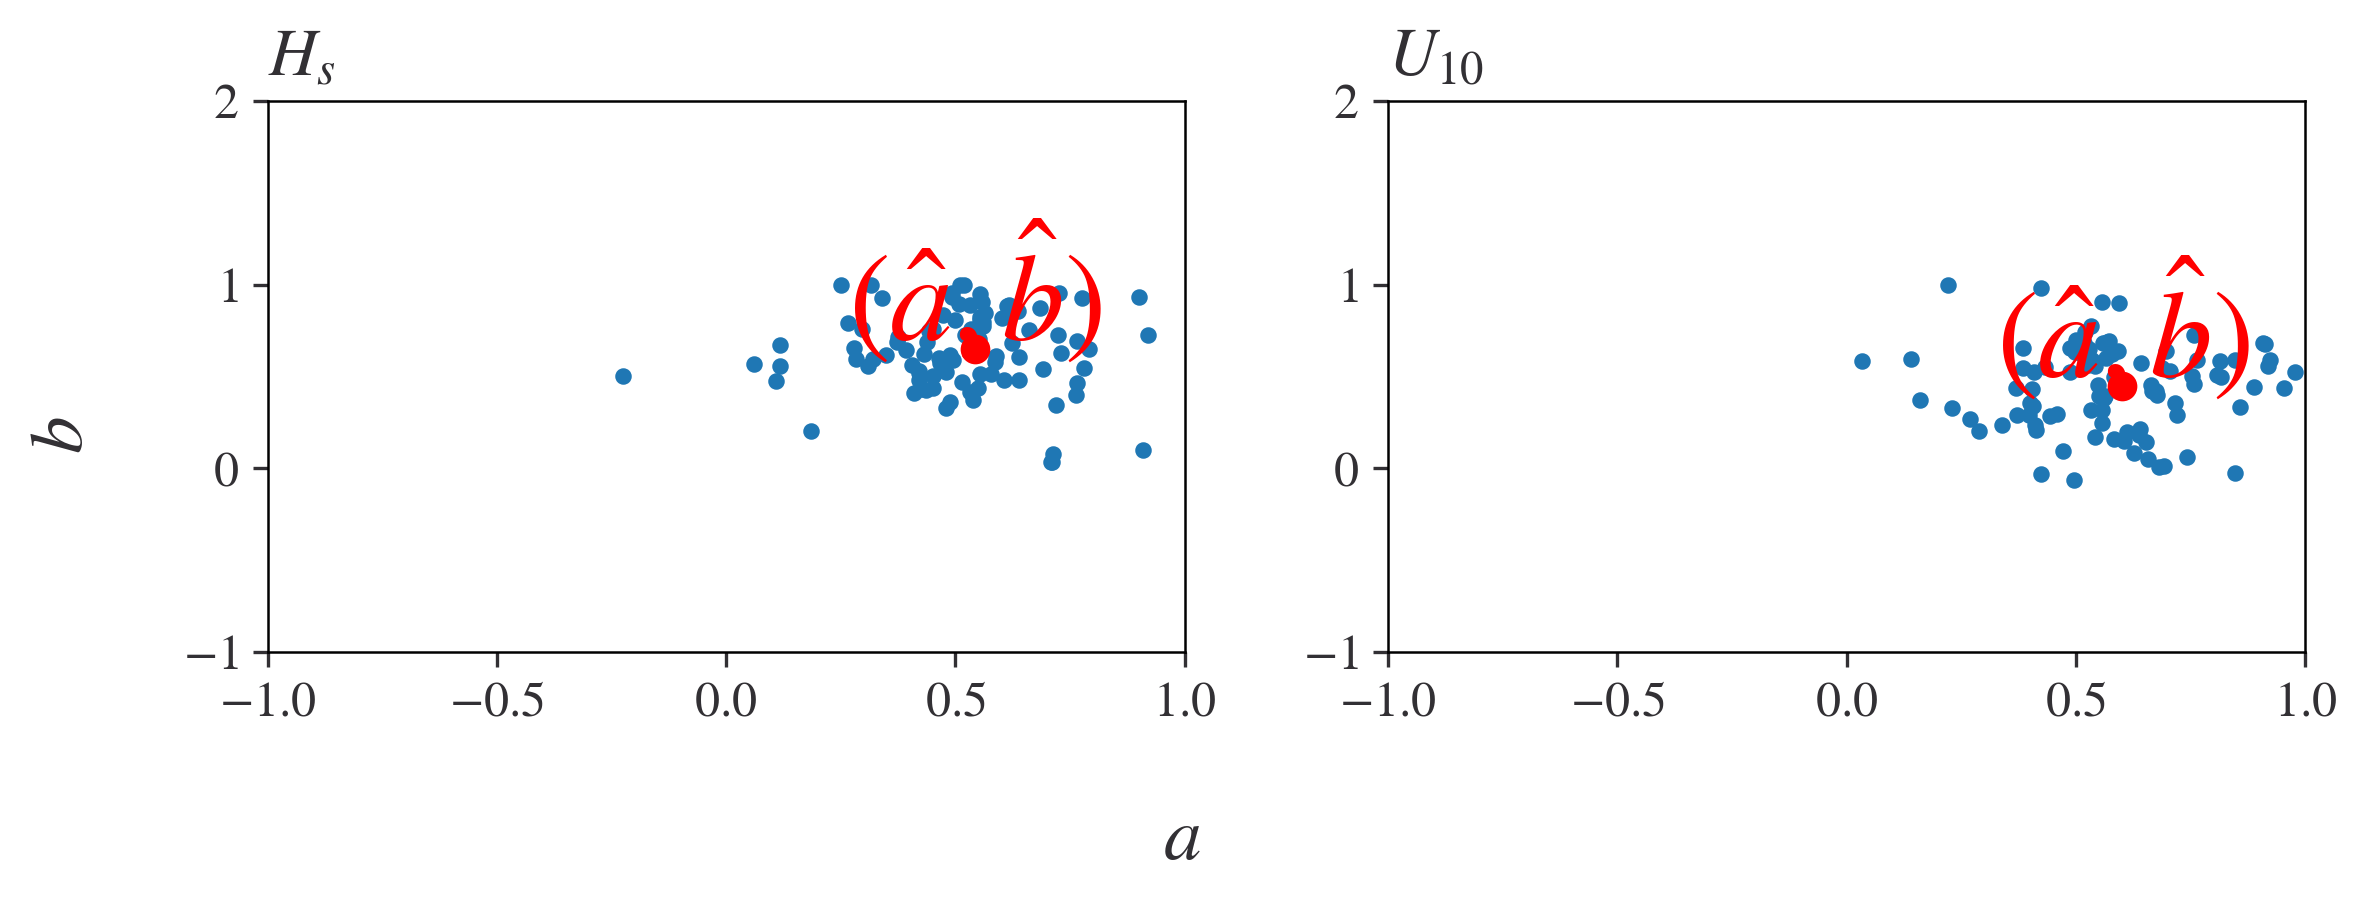

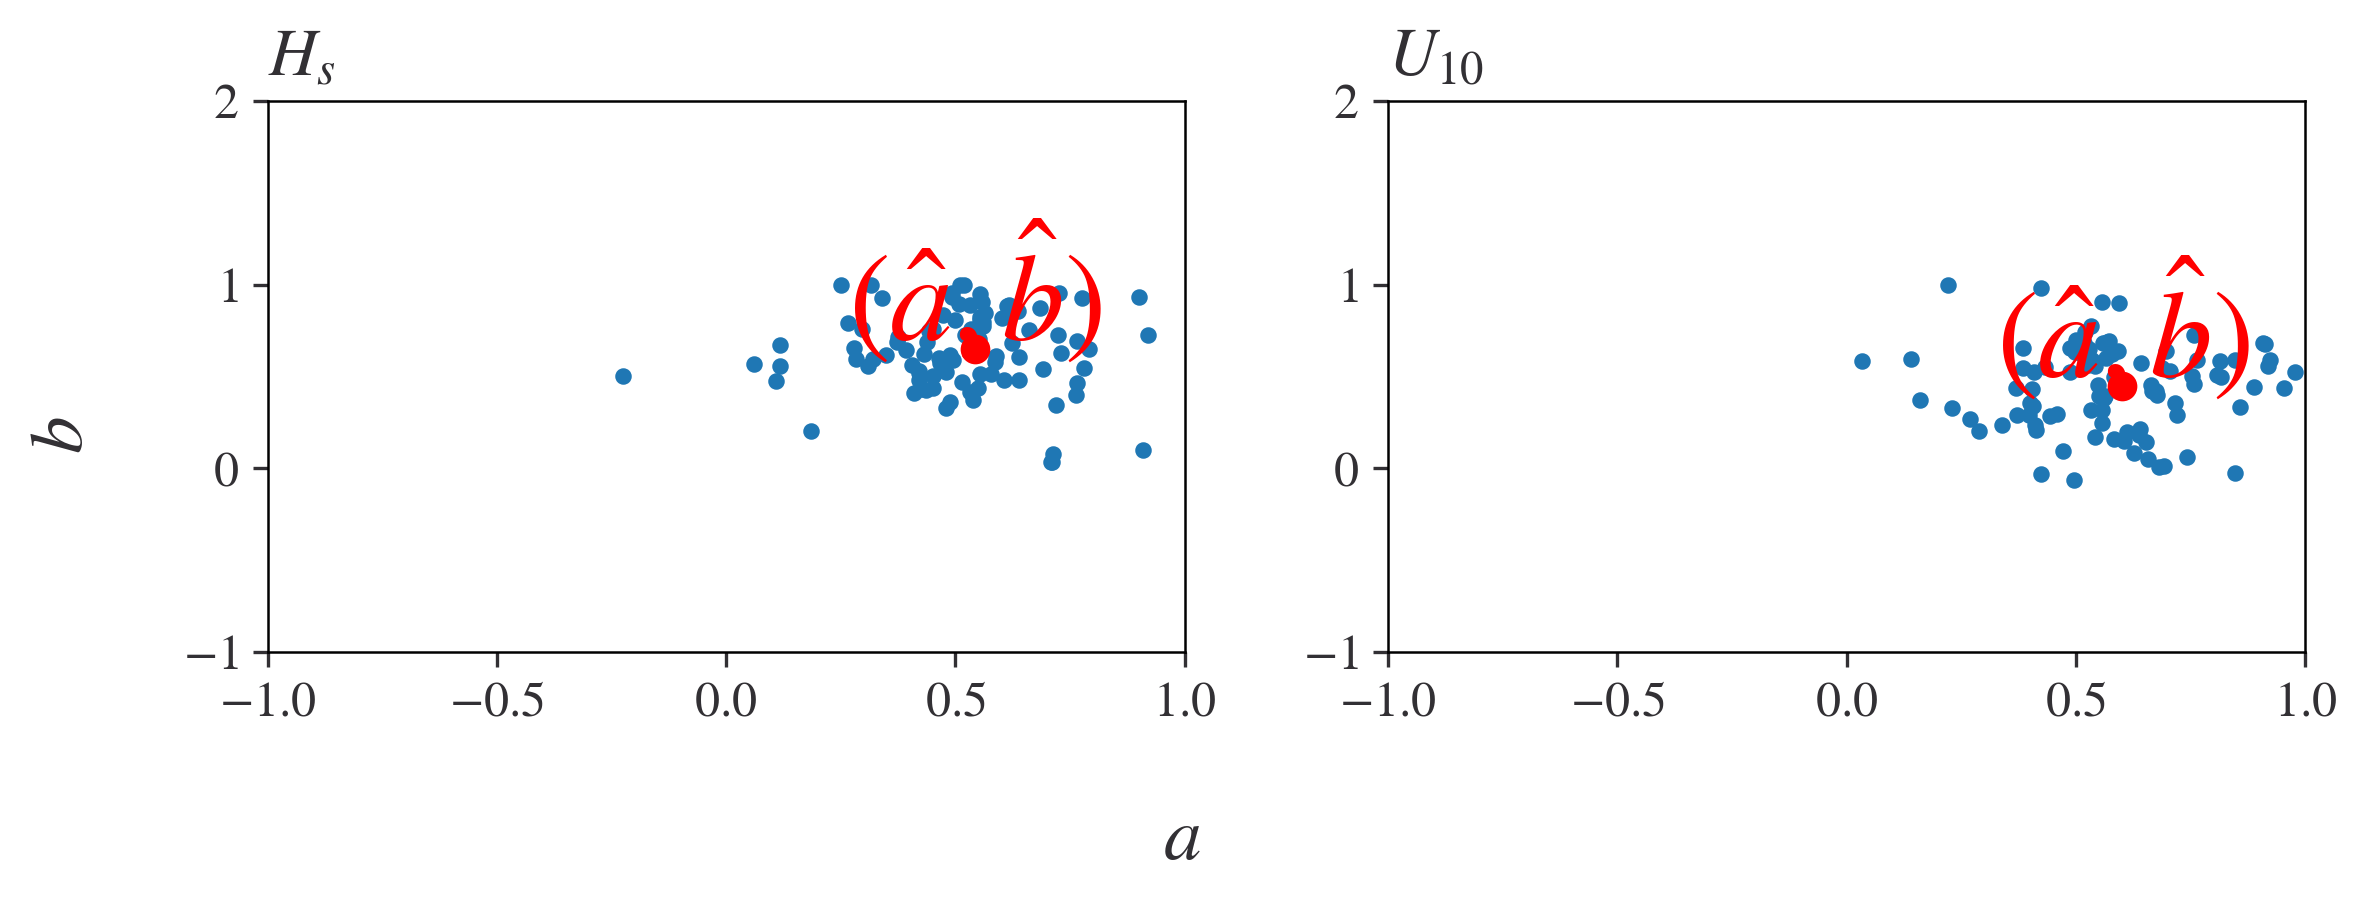

In [16]:
grapher_condition.draw("ab_Estimates",draw_fig=True)

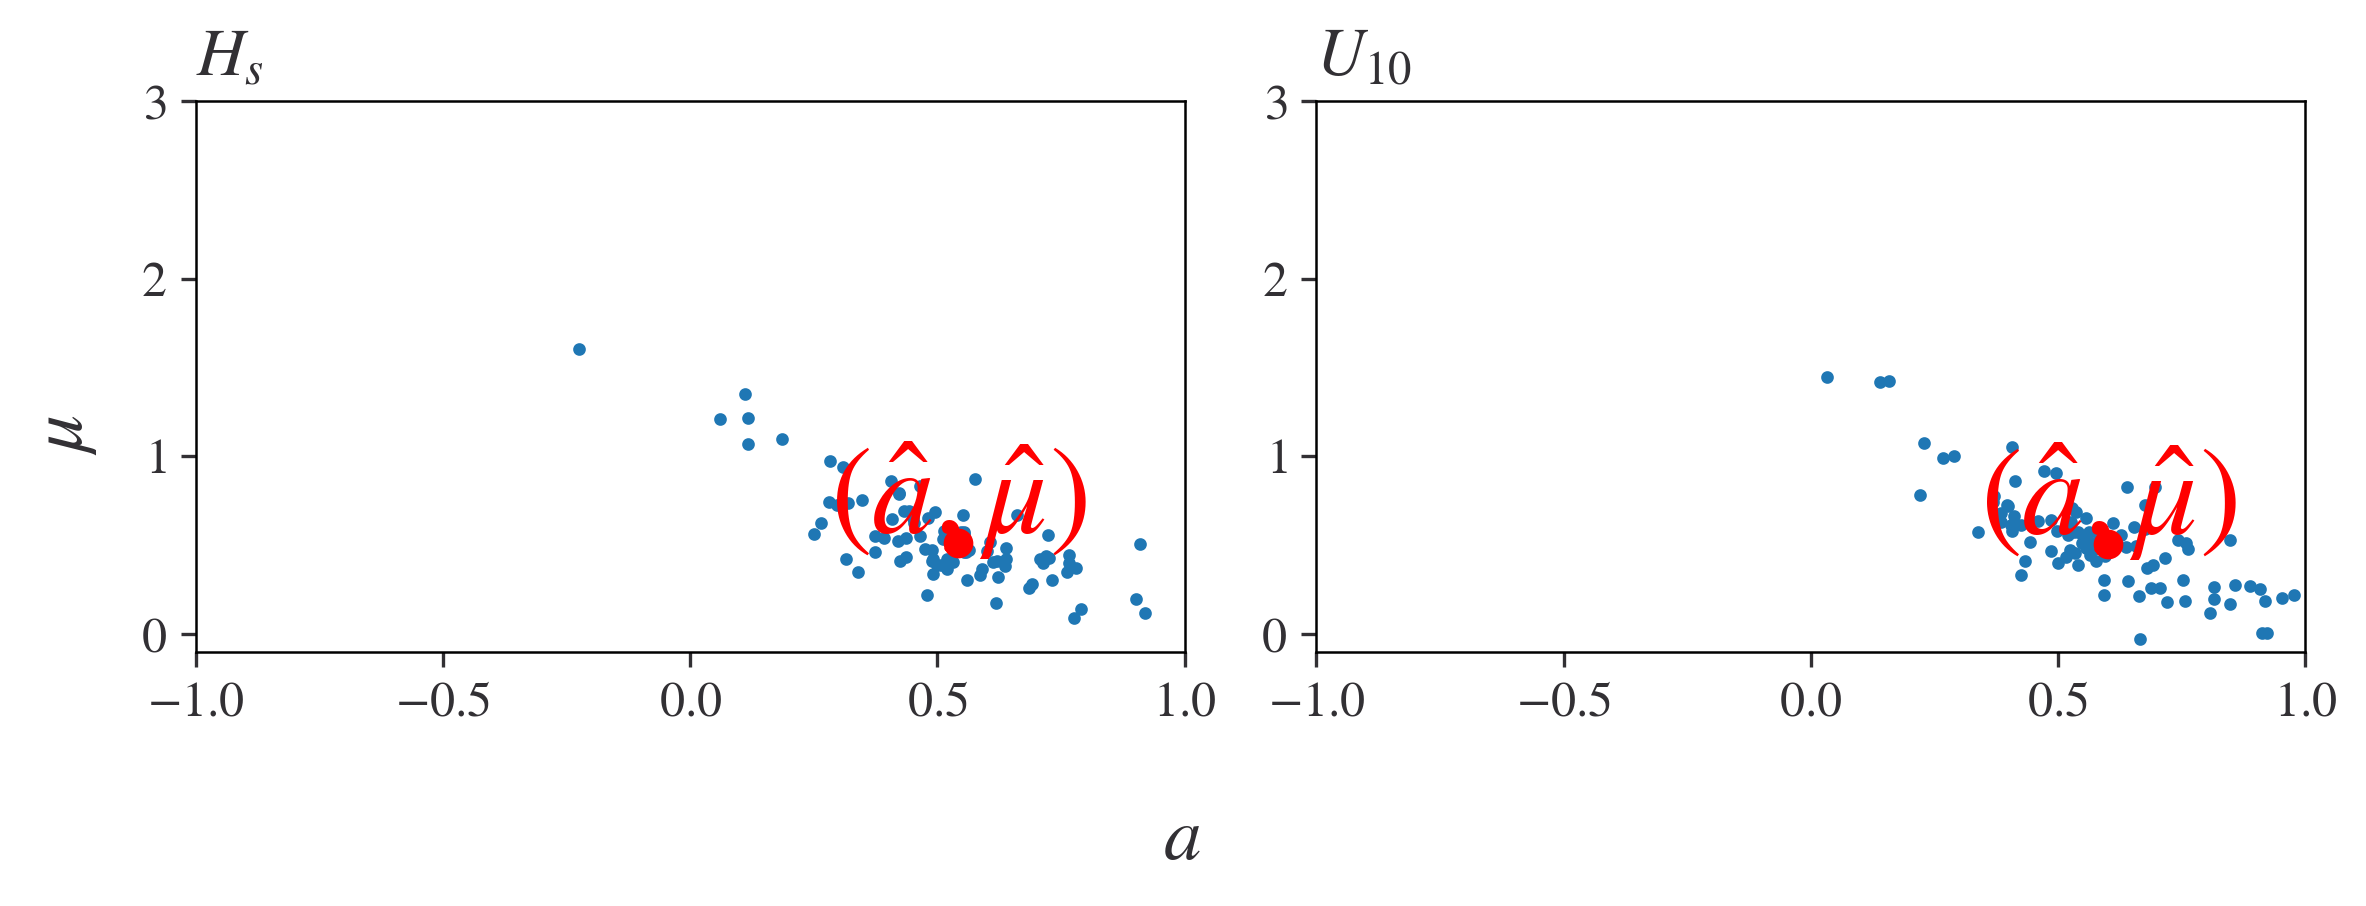

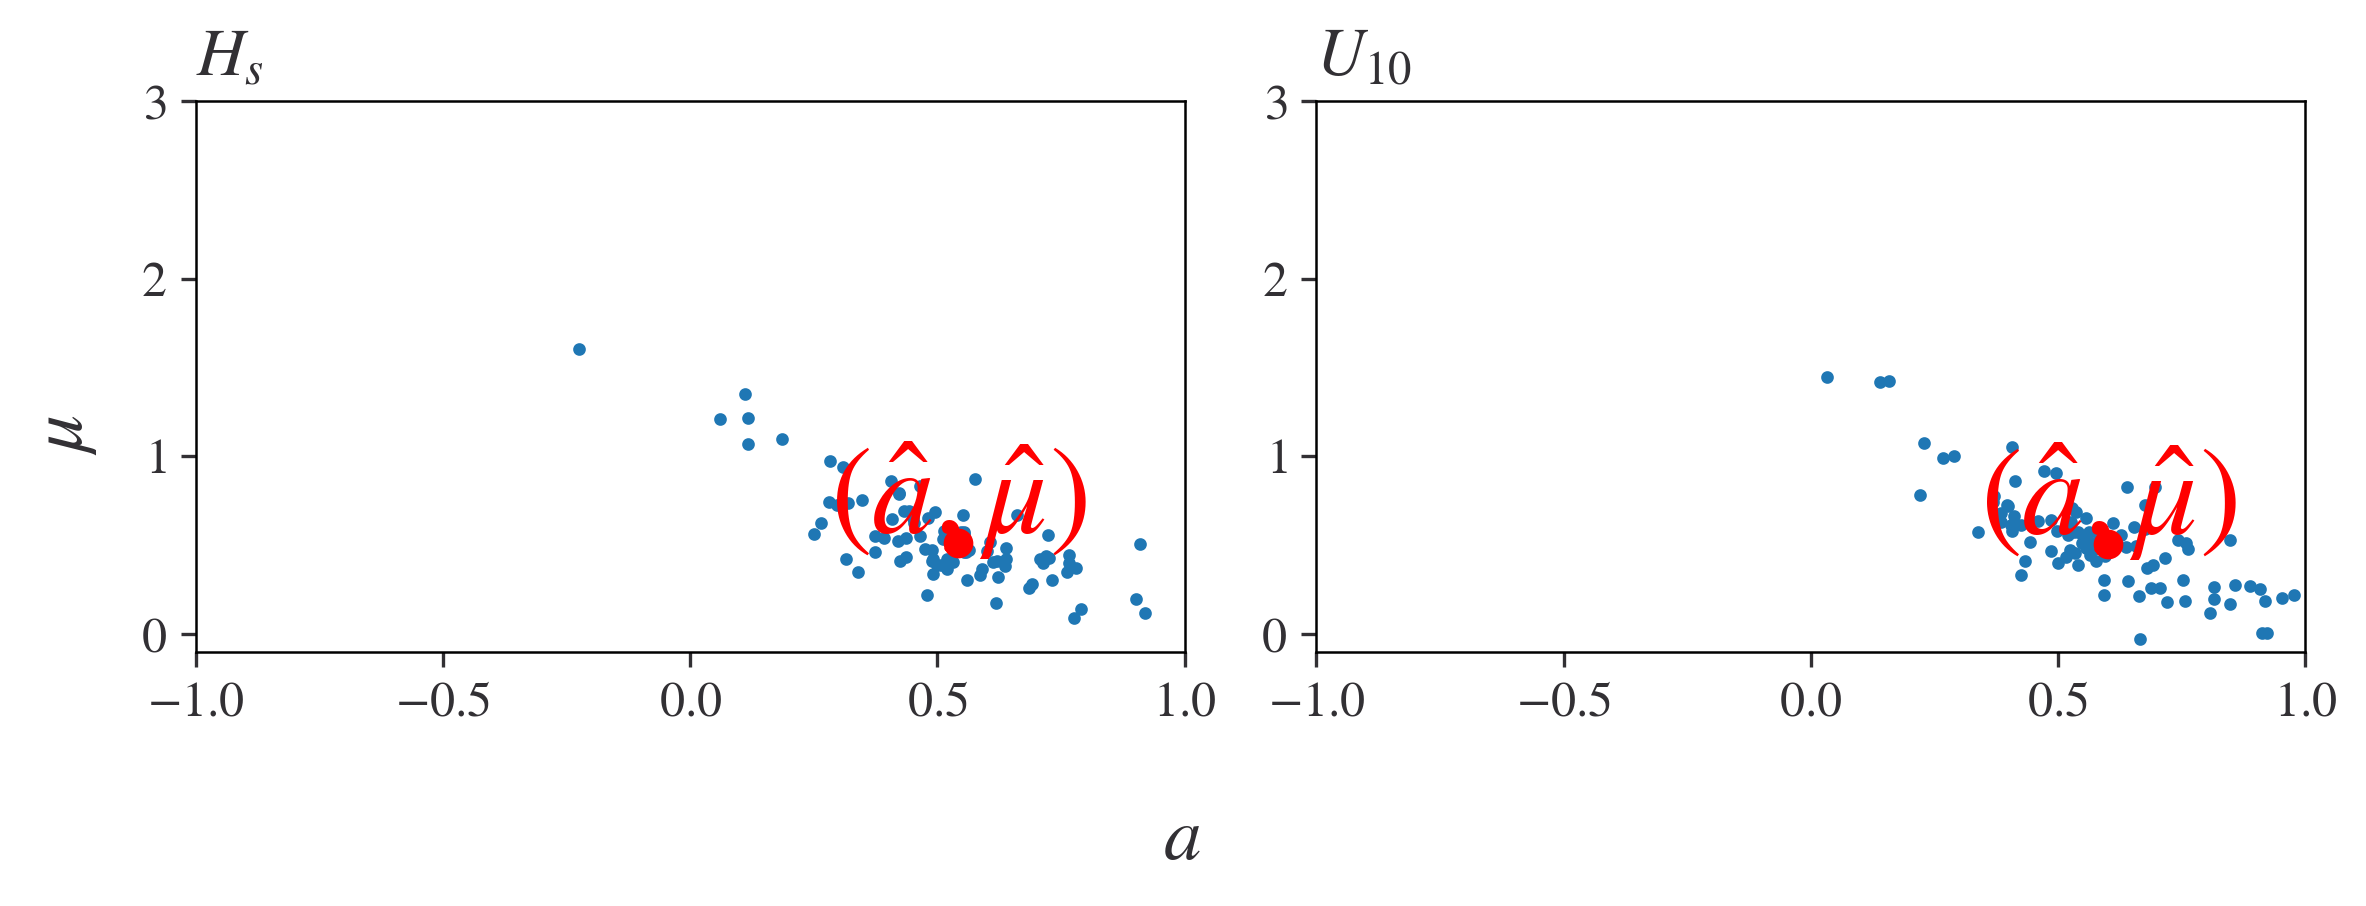

In [17]:
grapher_condition.draw("amu_Estimates",draw_fig=True)


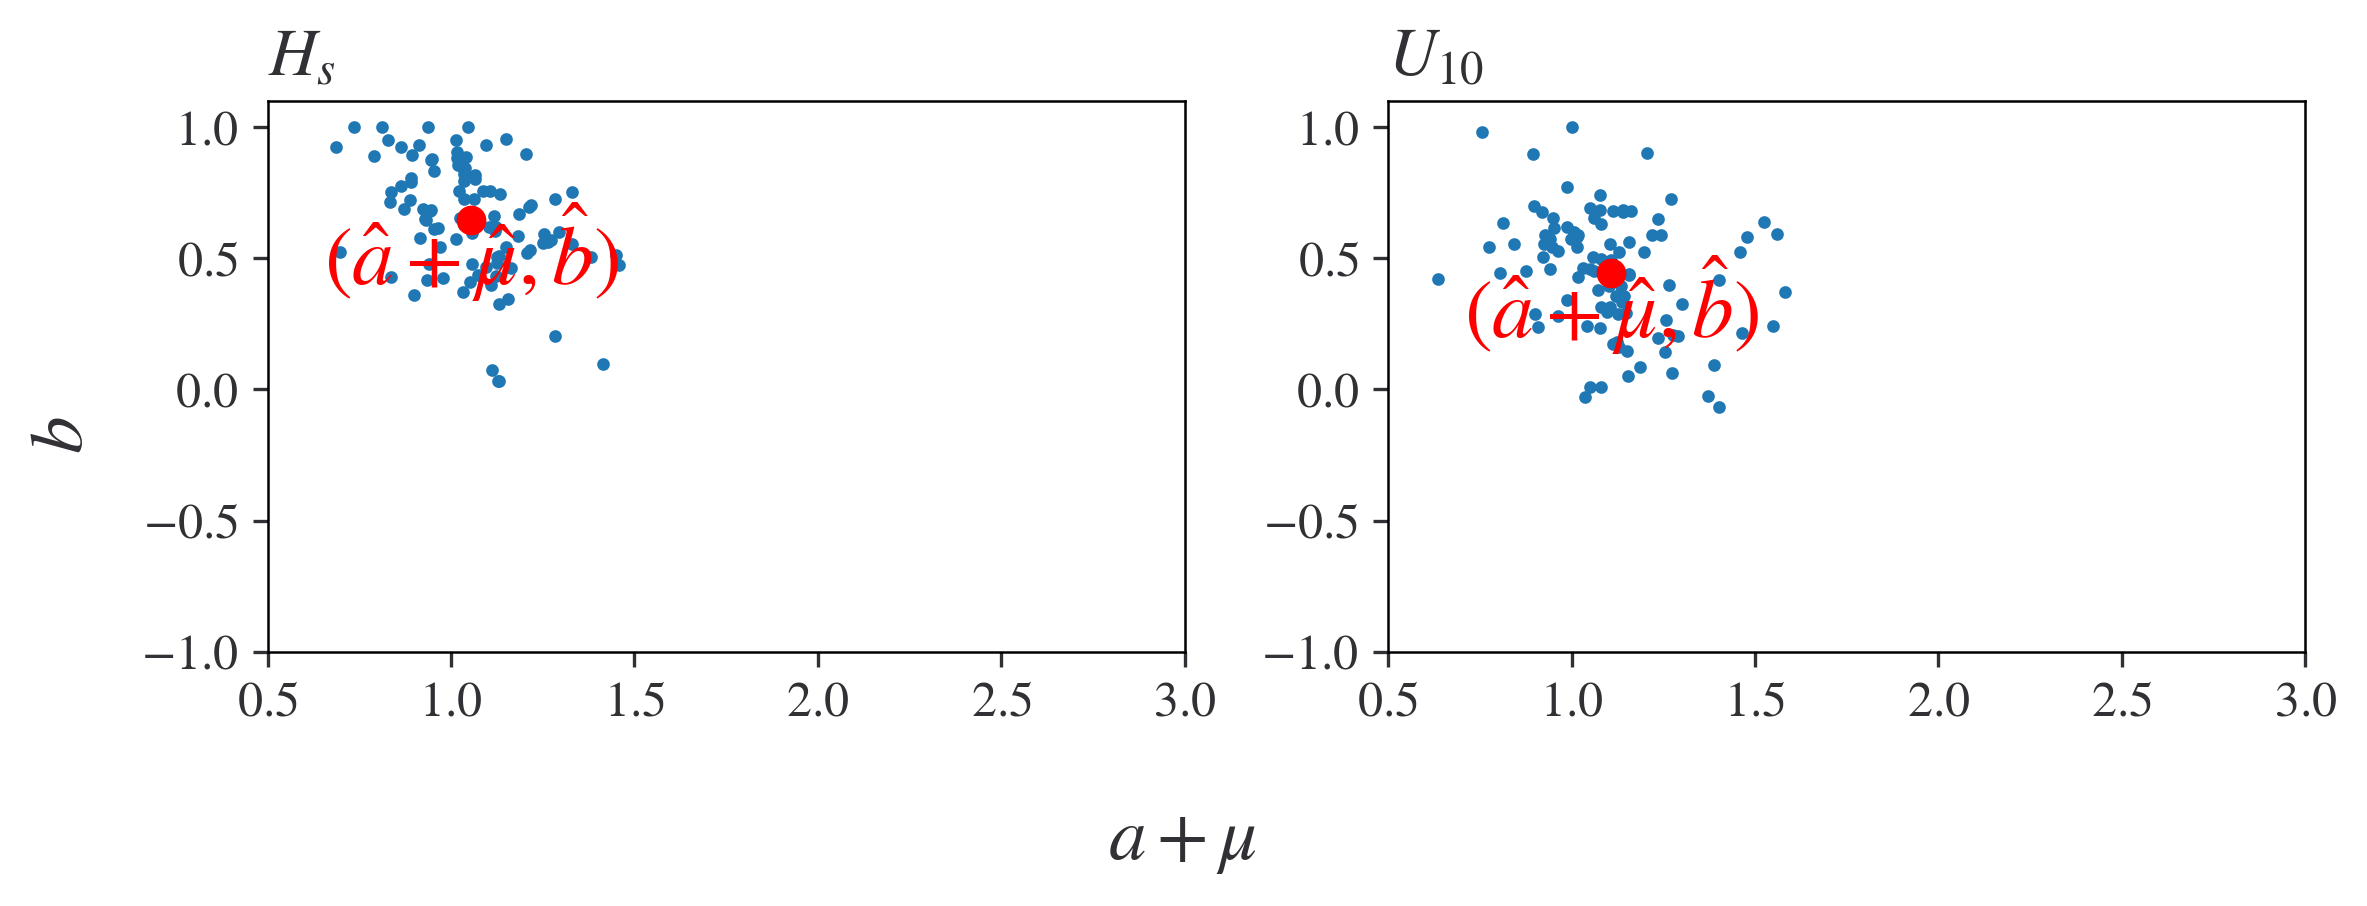

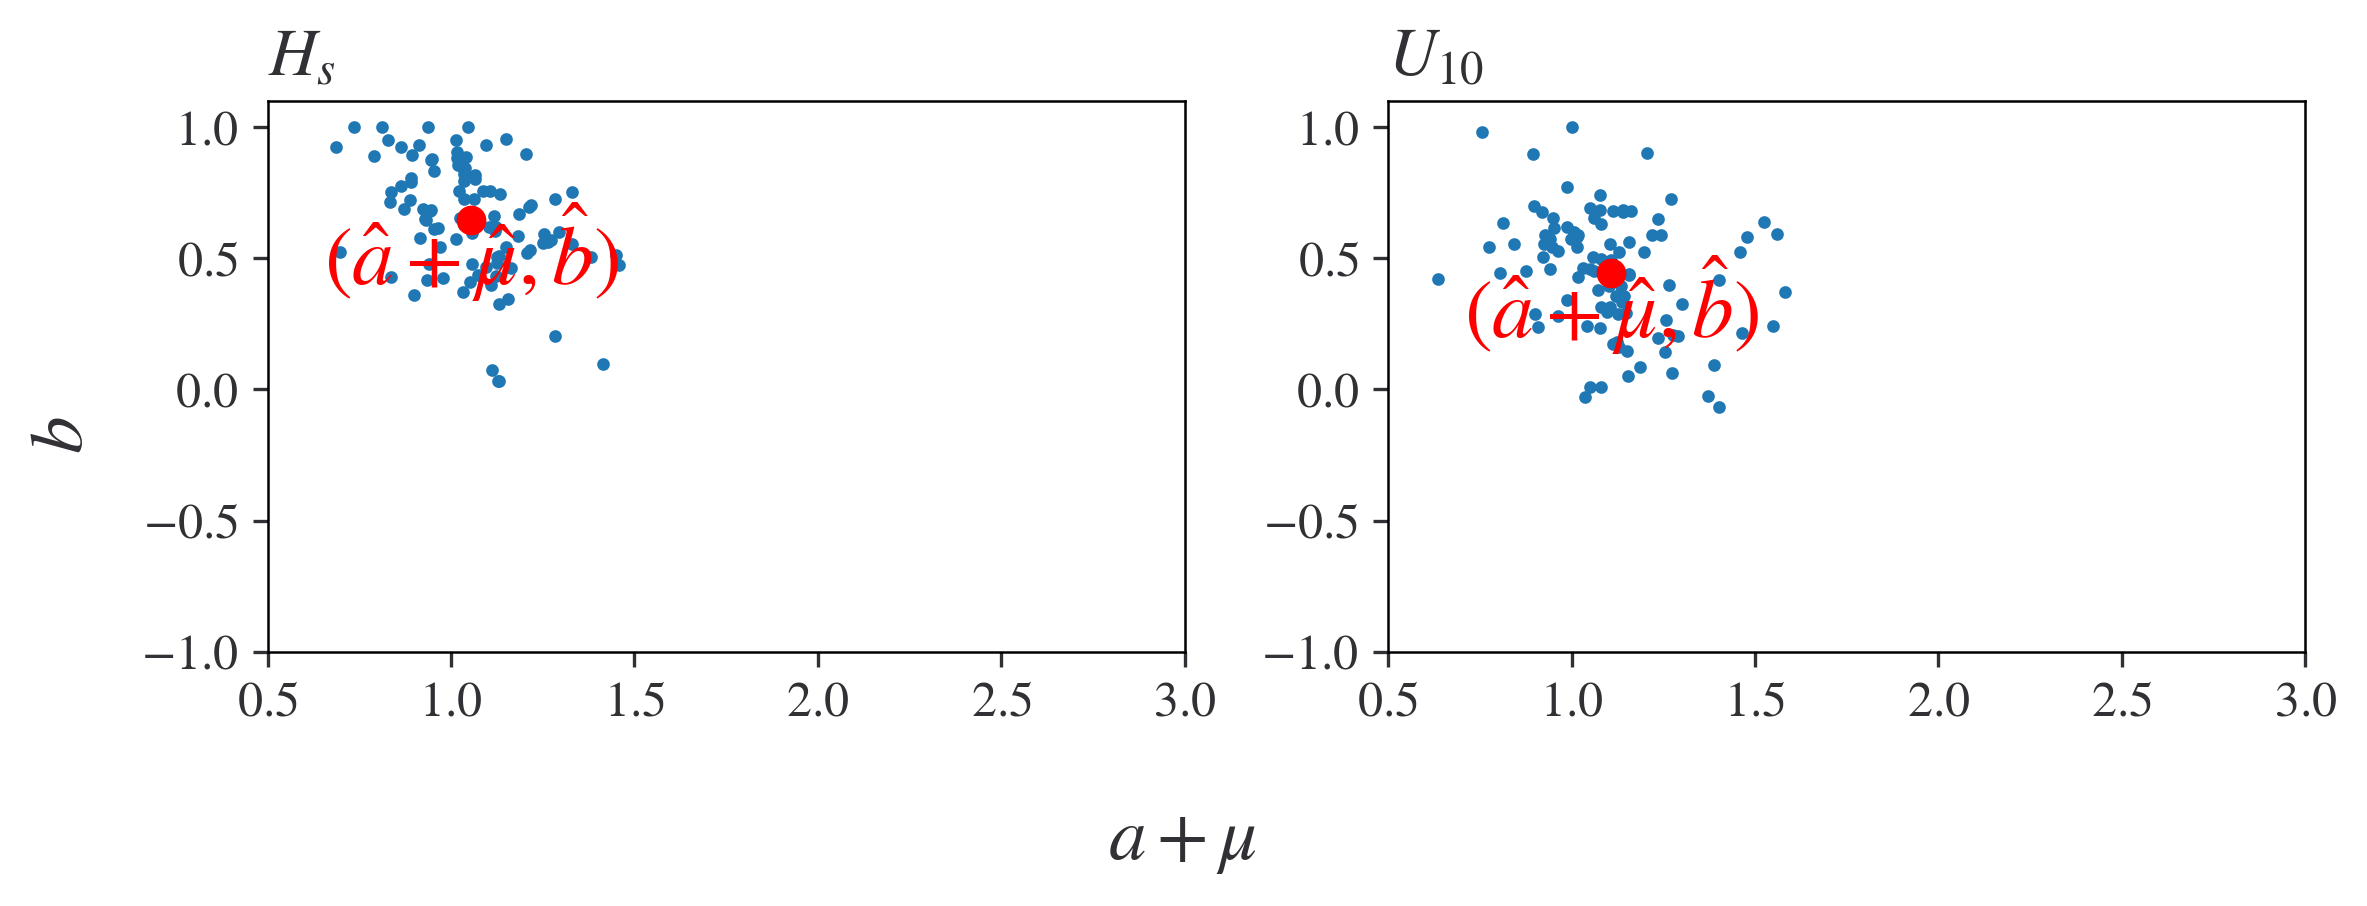

In [18]:
grapher_condition.draw("a+mub_Estimates",draw_fig=True)

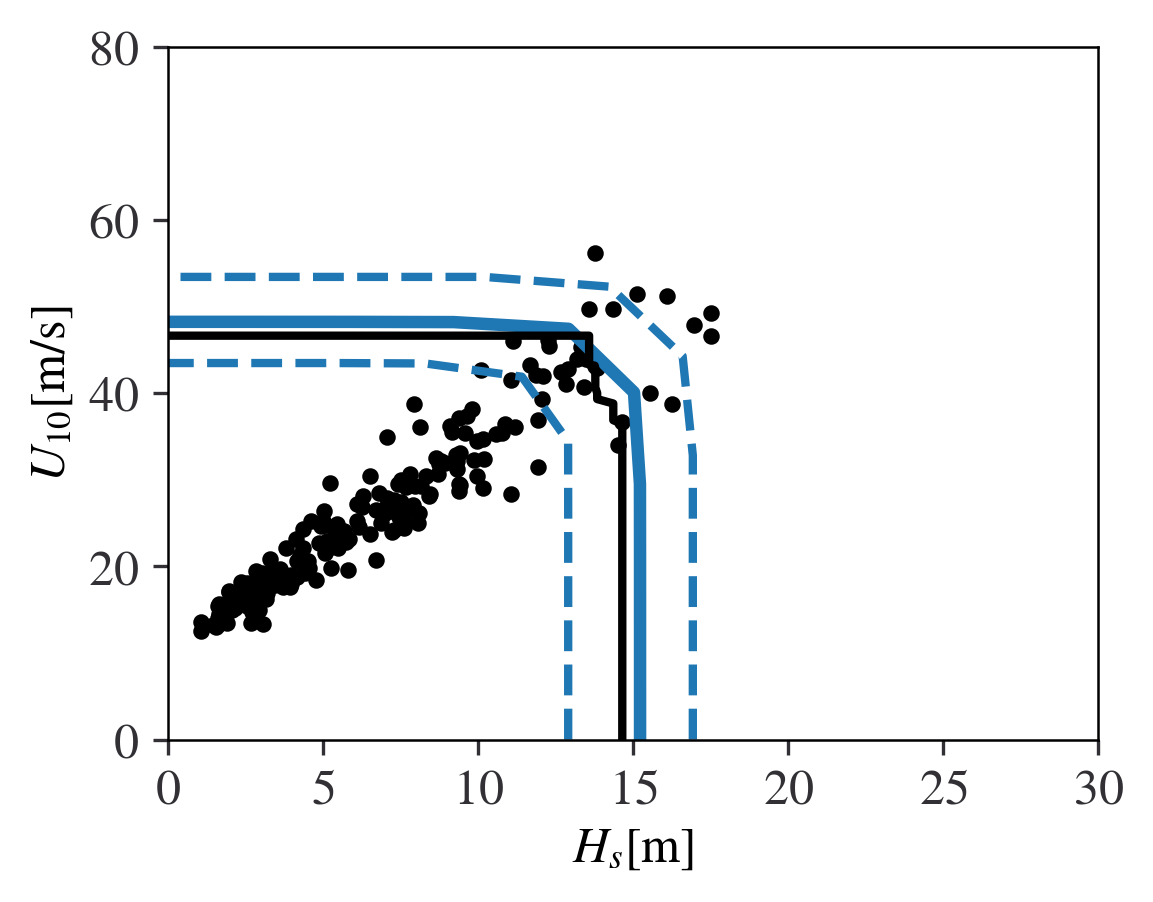

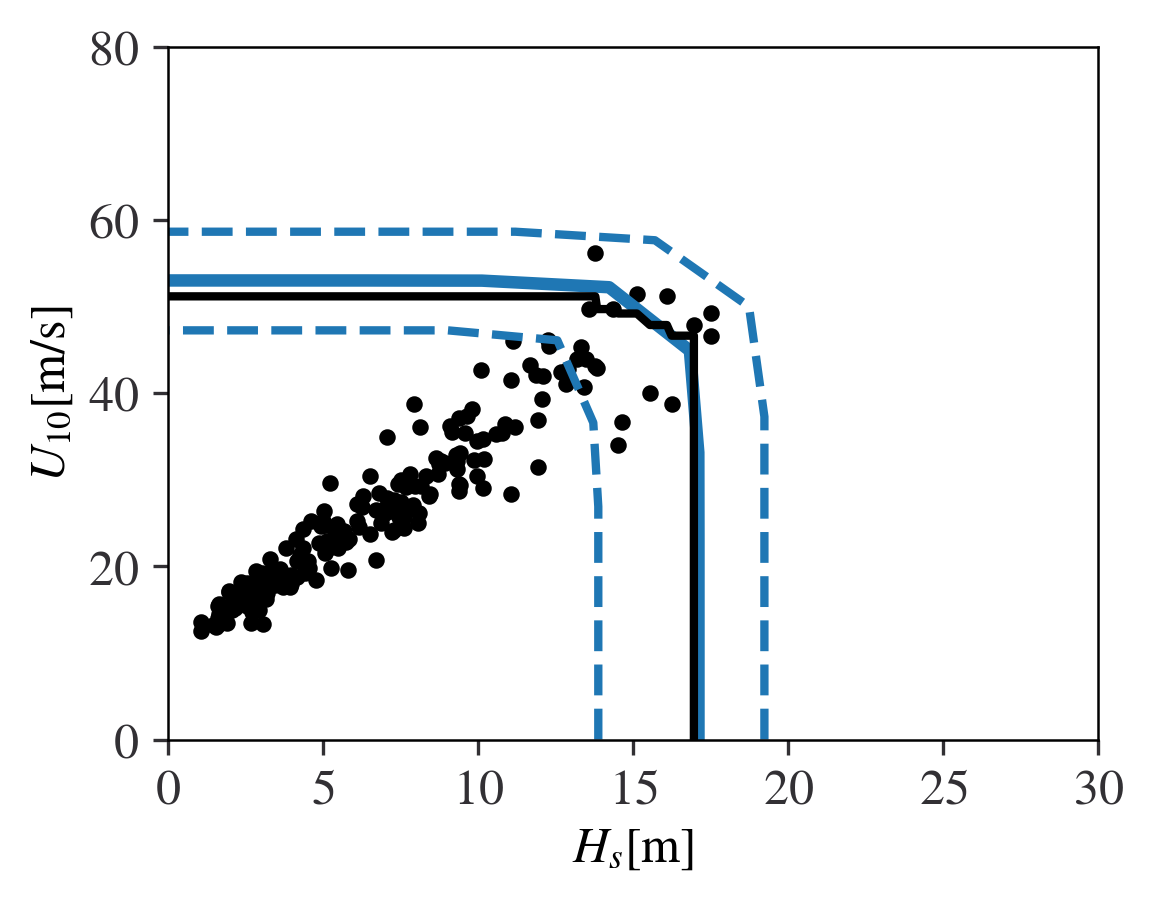

In [19]:
for rp in [100,300]:
  grapher_condition.draw("RV_STM", return_period=rp, stm_MSTME_ss=stm_MSTME_ss, draw_fig=True)

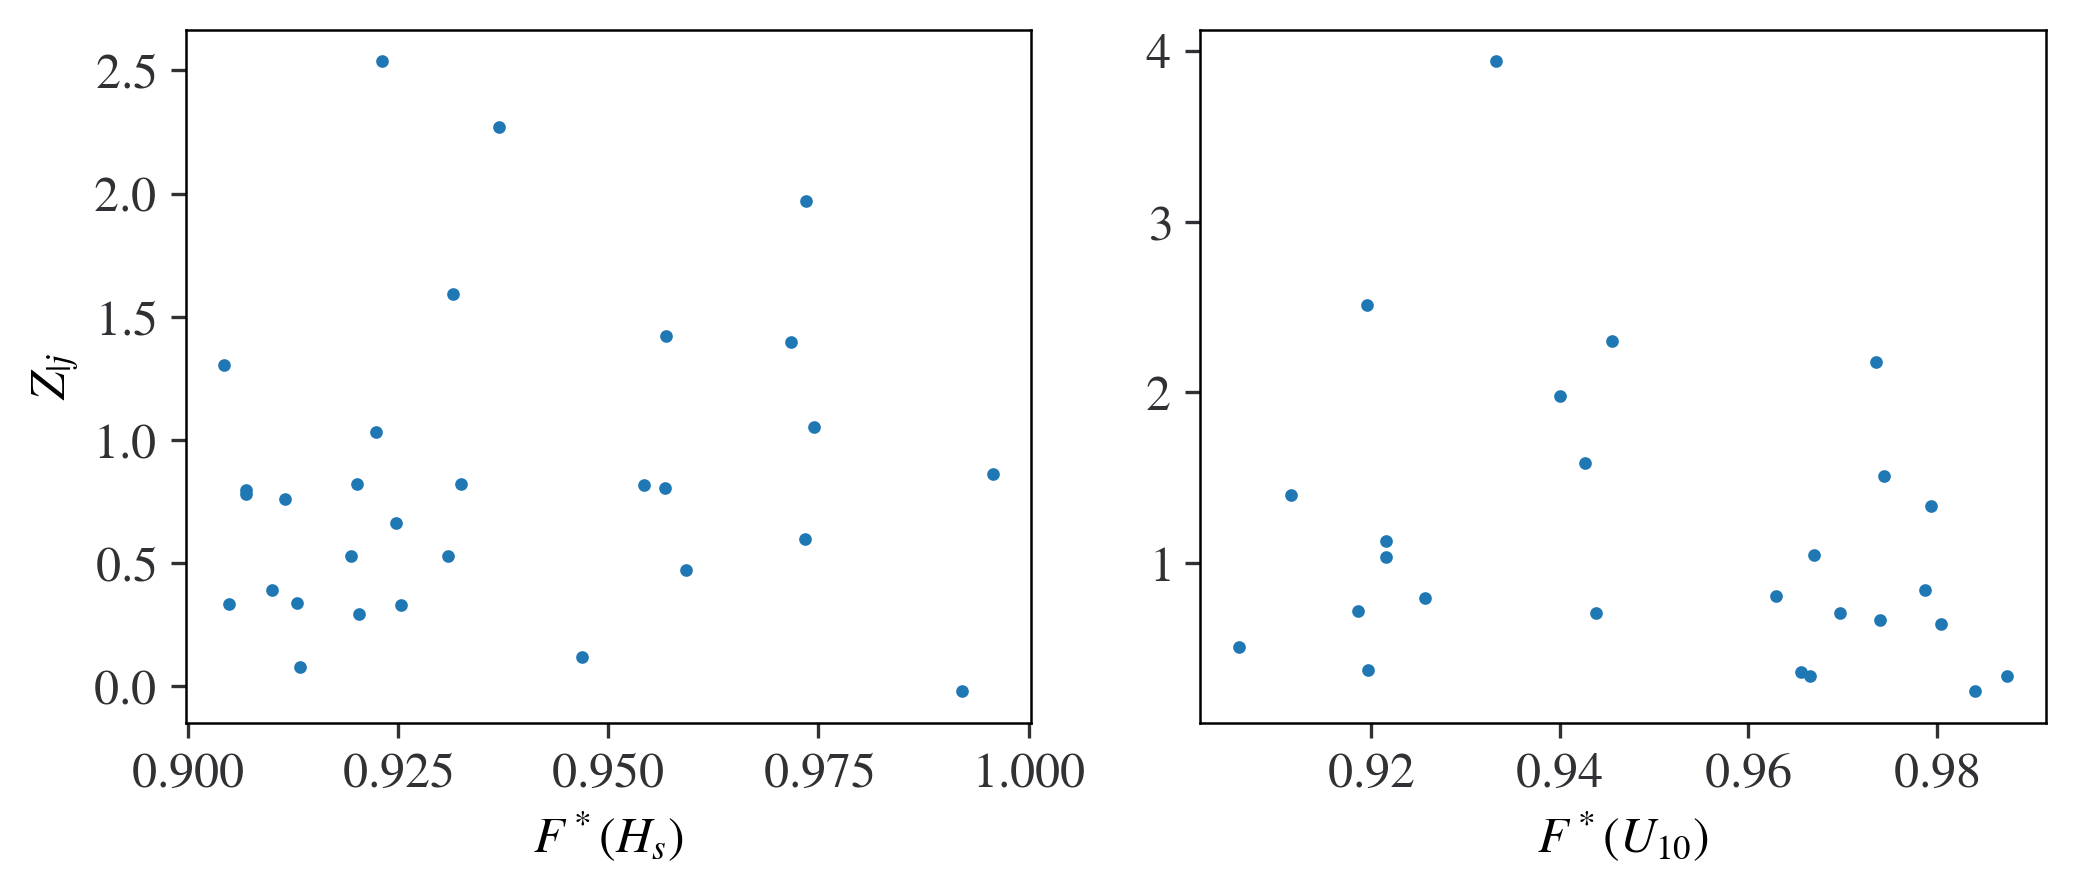

In [21]:
grapher_condition.draw("Residuals")

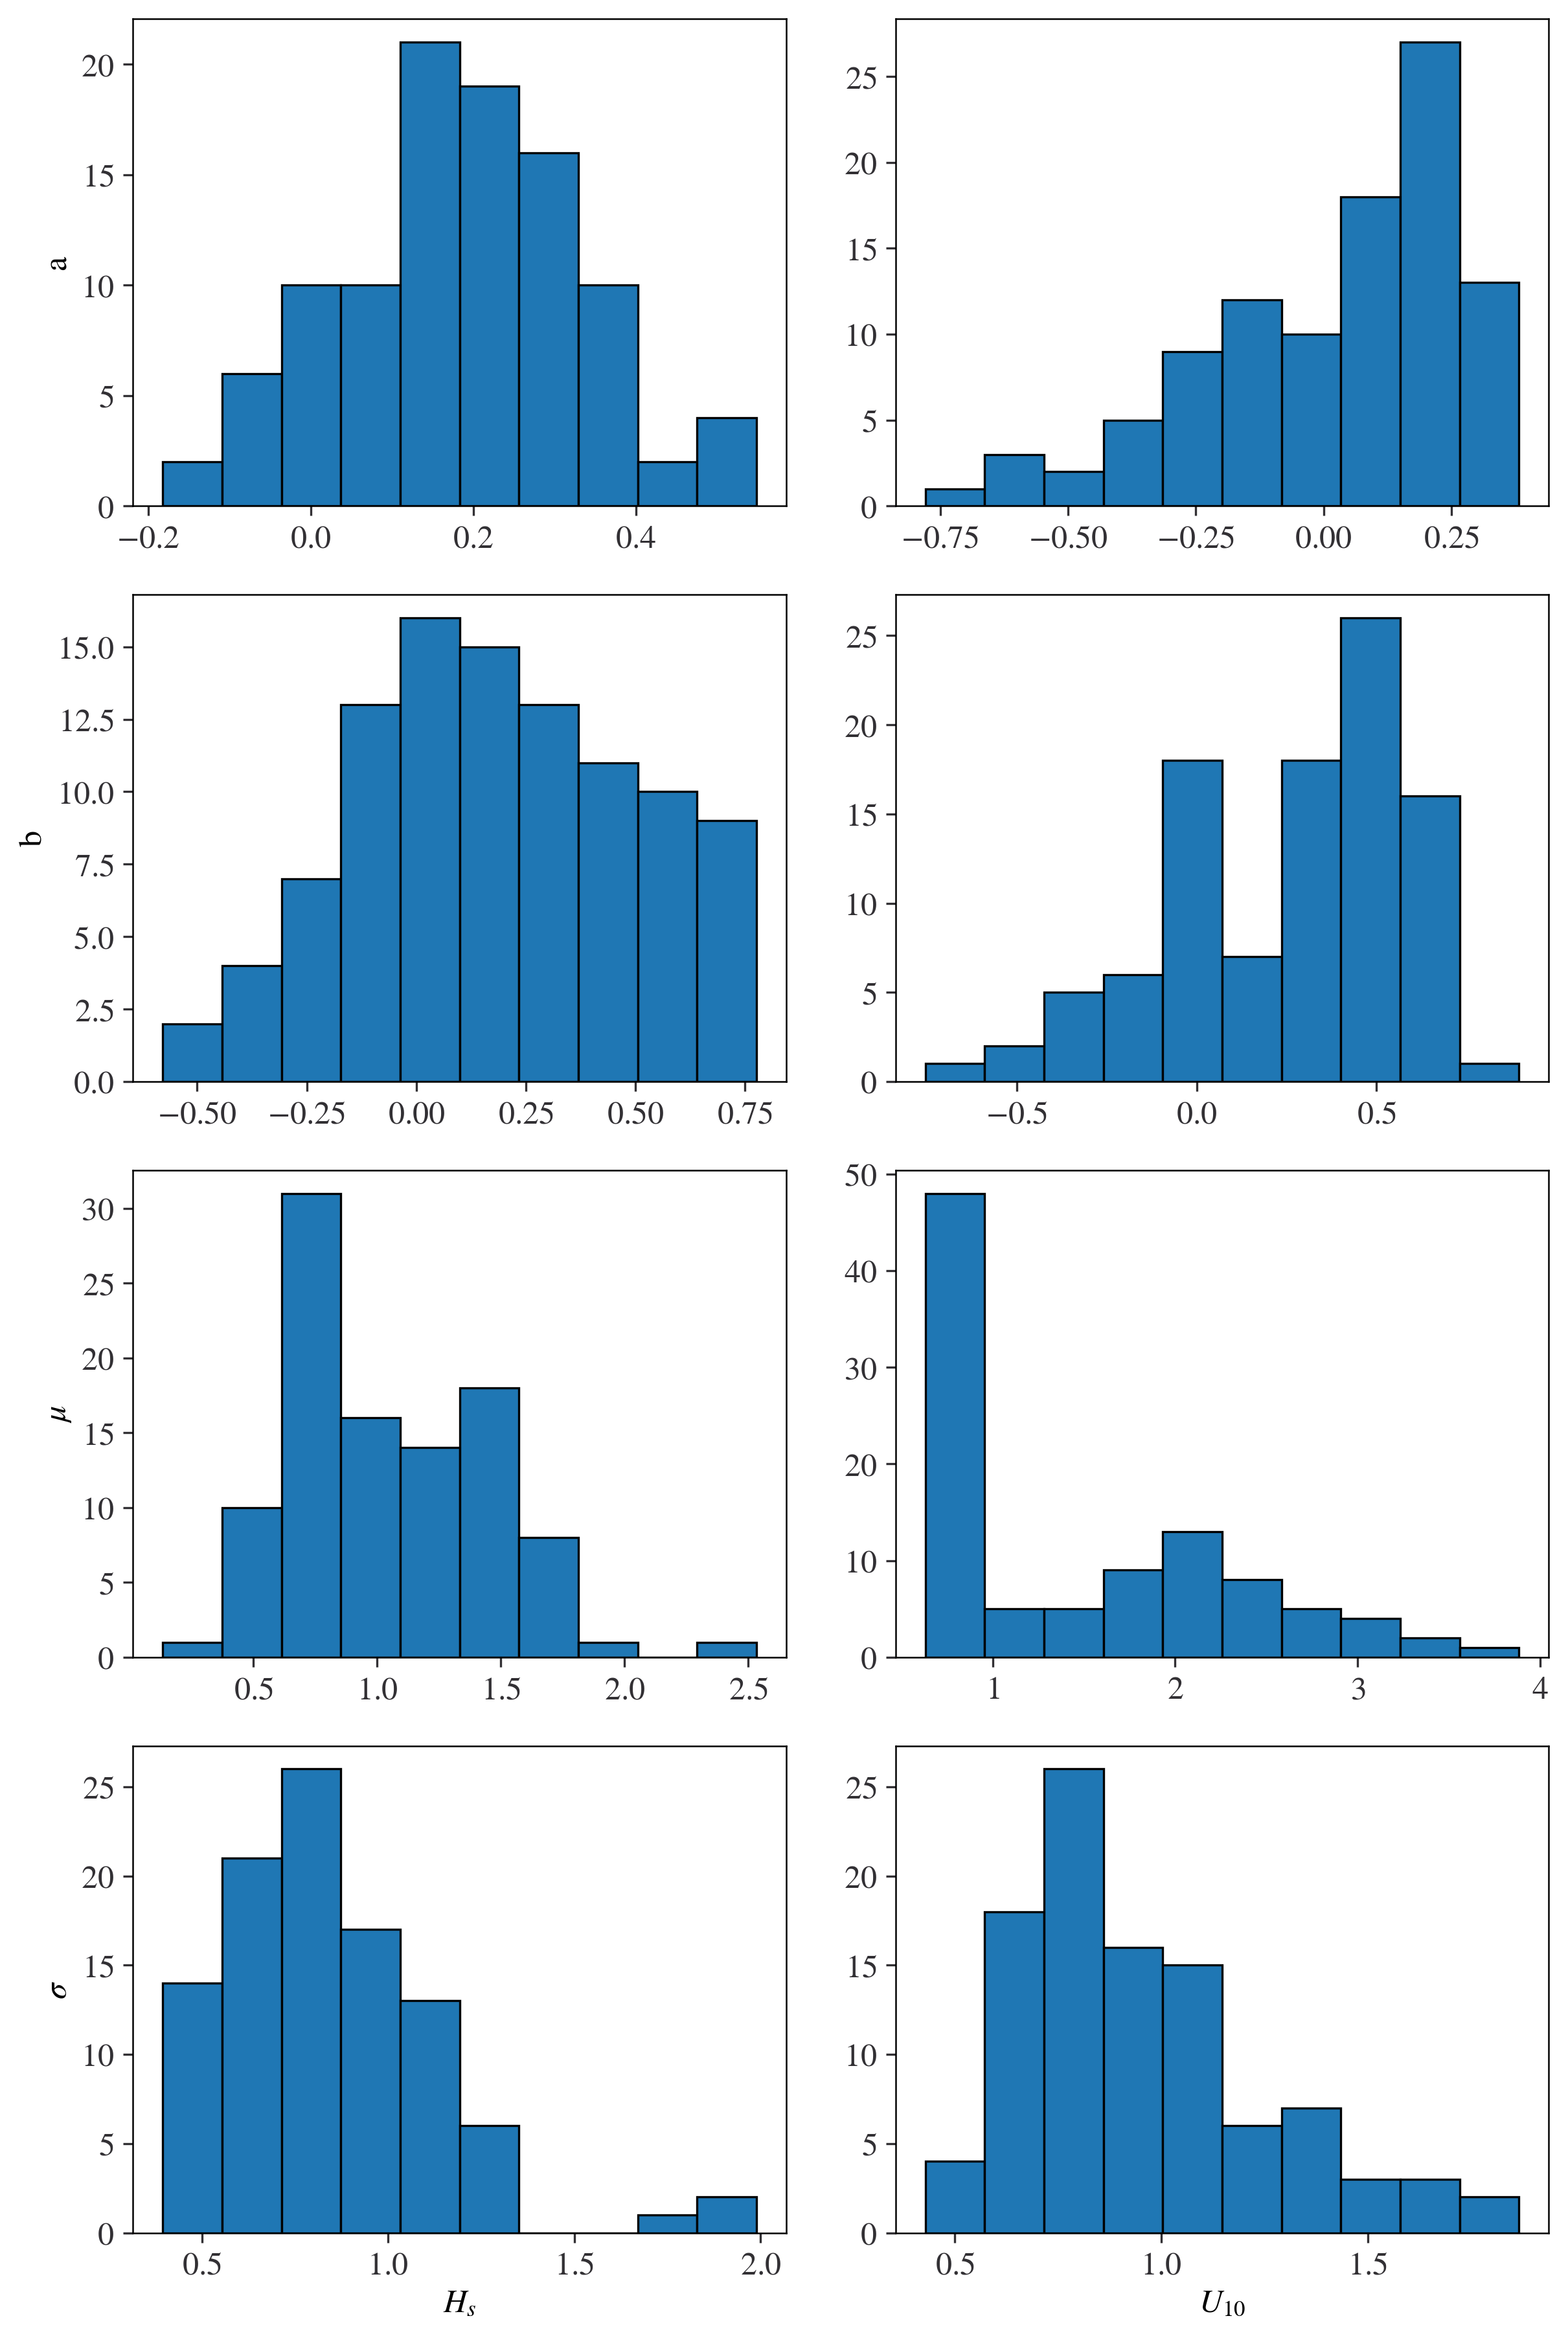

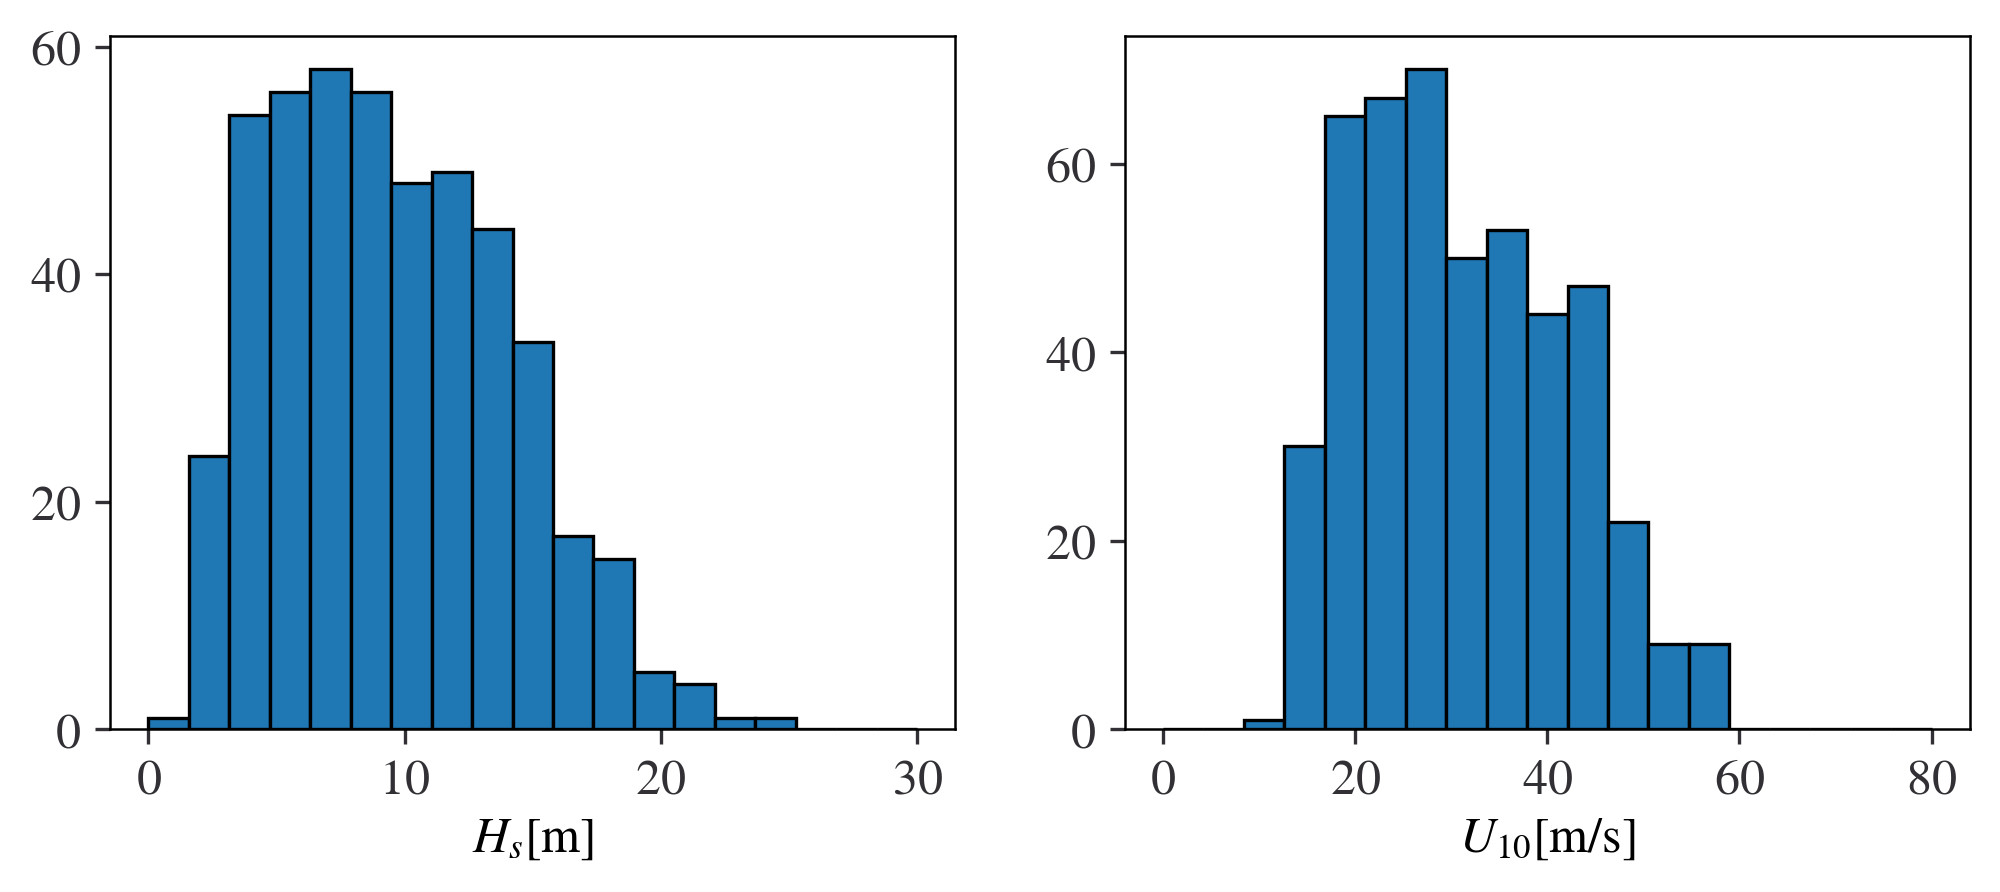

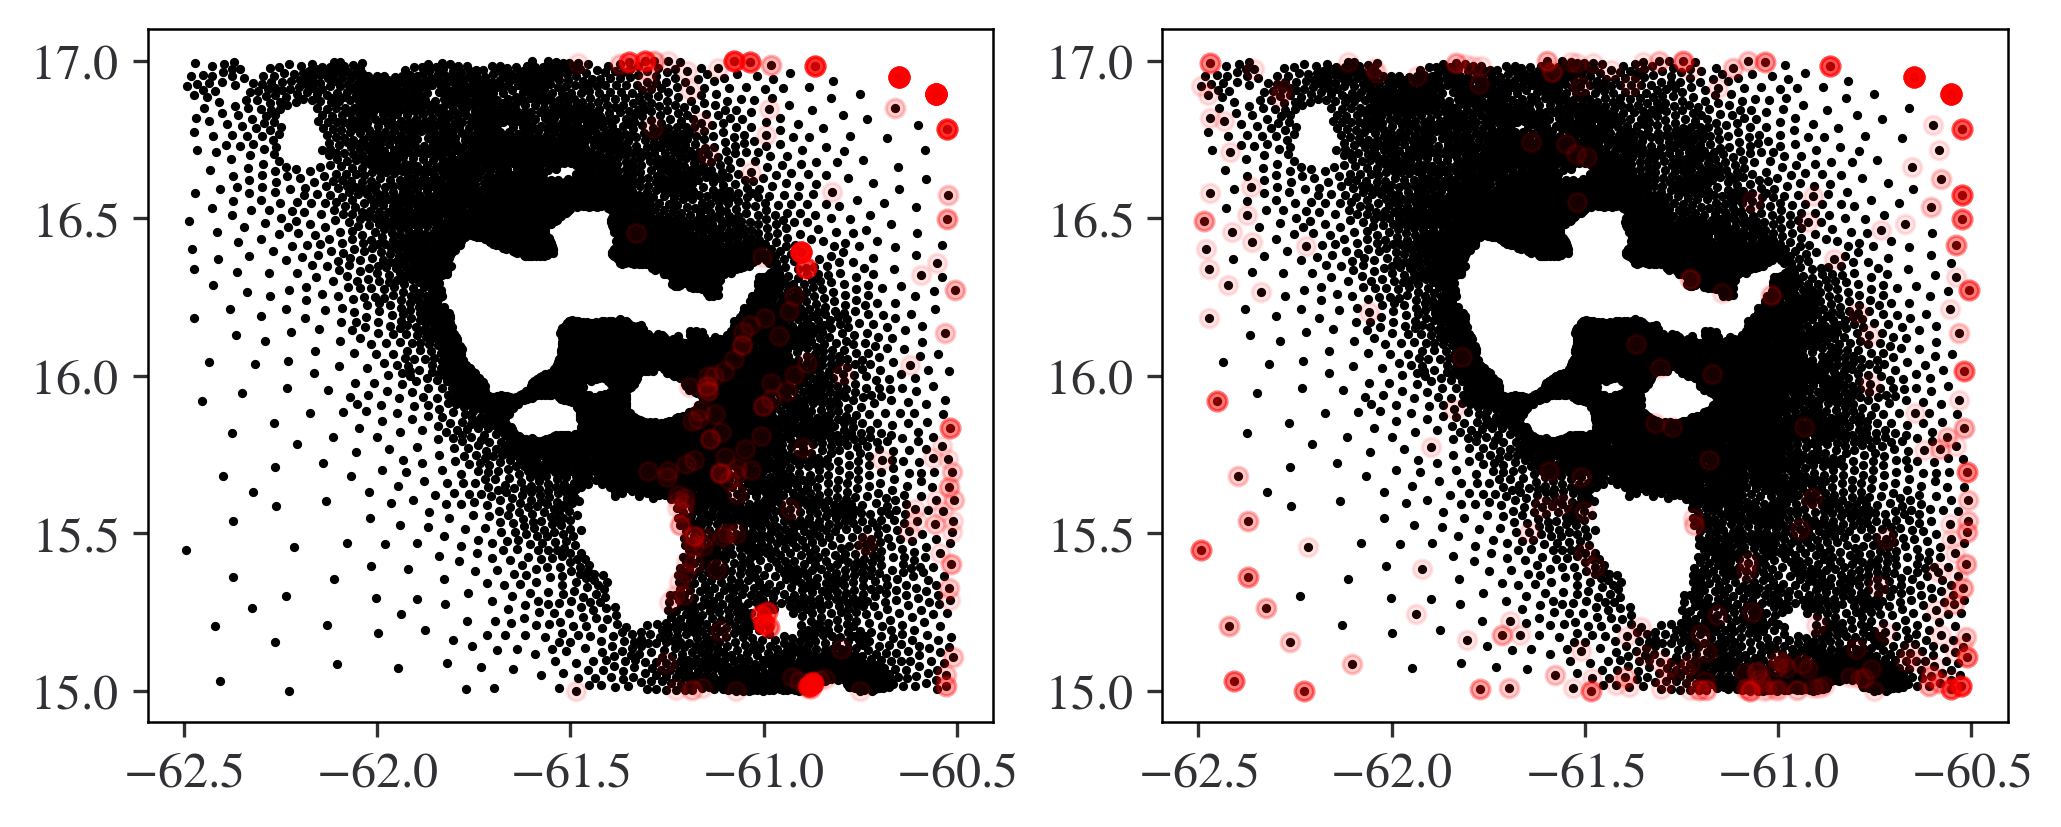

In [11]:
_ =grapher_condition.draw("Conmul_Estimates",draw_fig=True)
_ =grapher_condition.draw("STM_Histogram",draw_fig=True)
_ =grapher_condition.draw("STM_location",draw_fig=True)




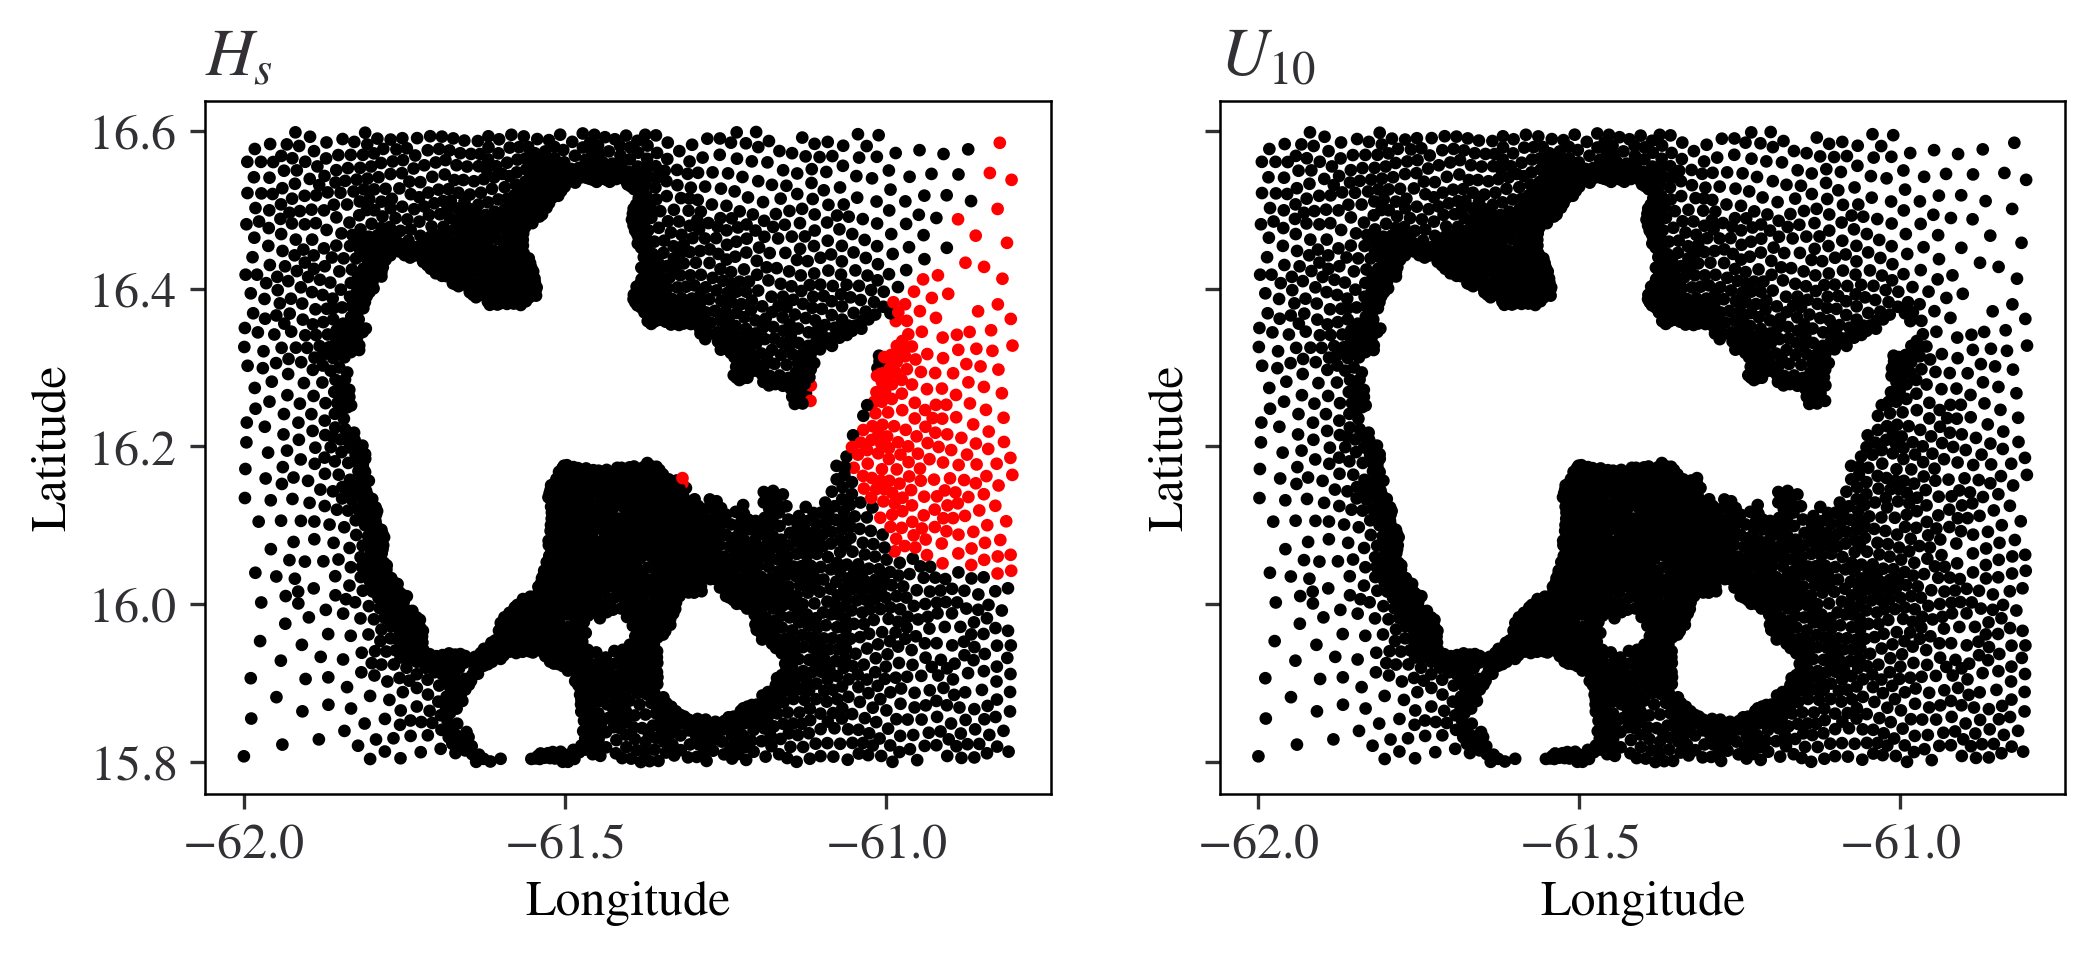

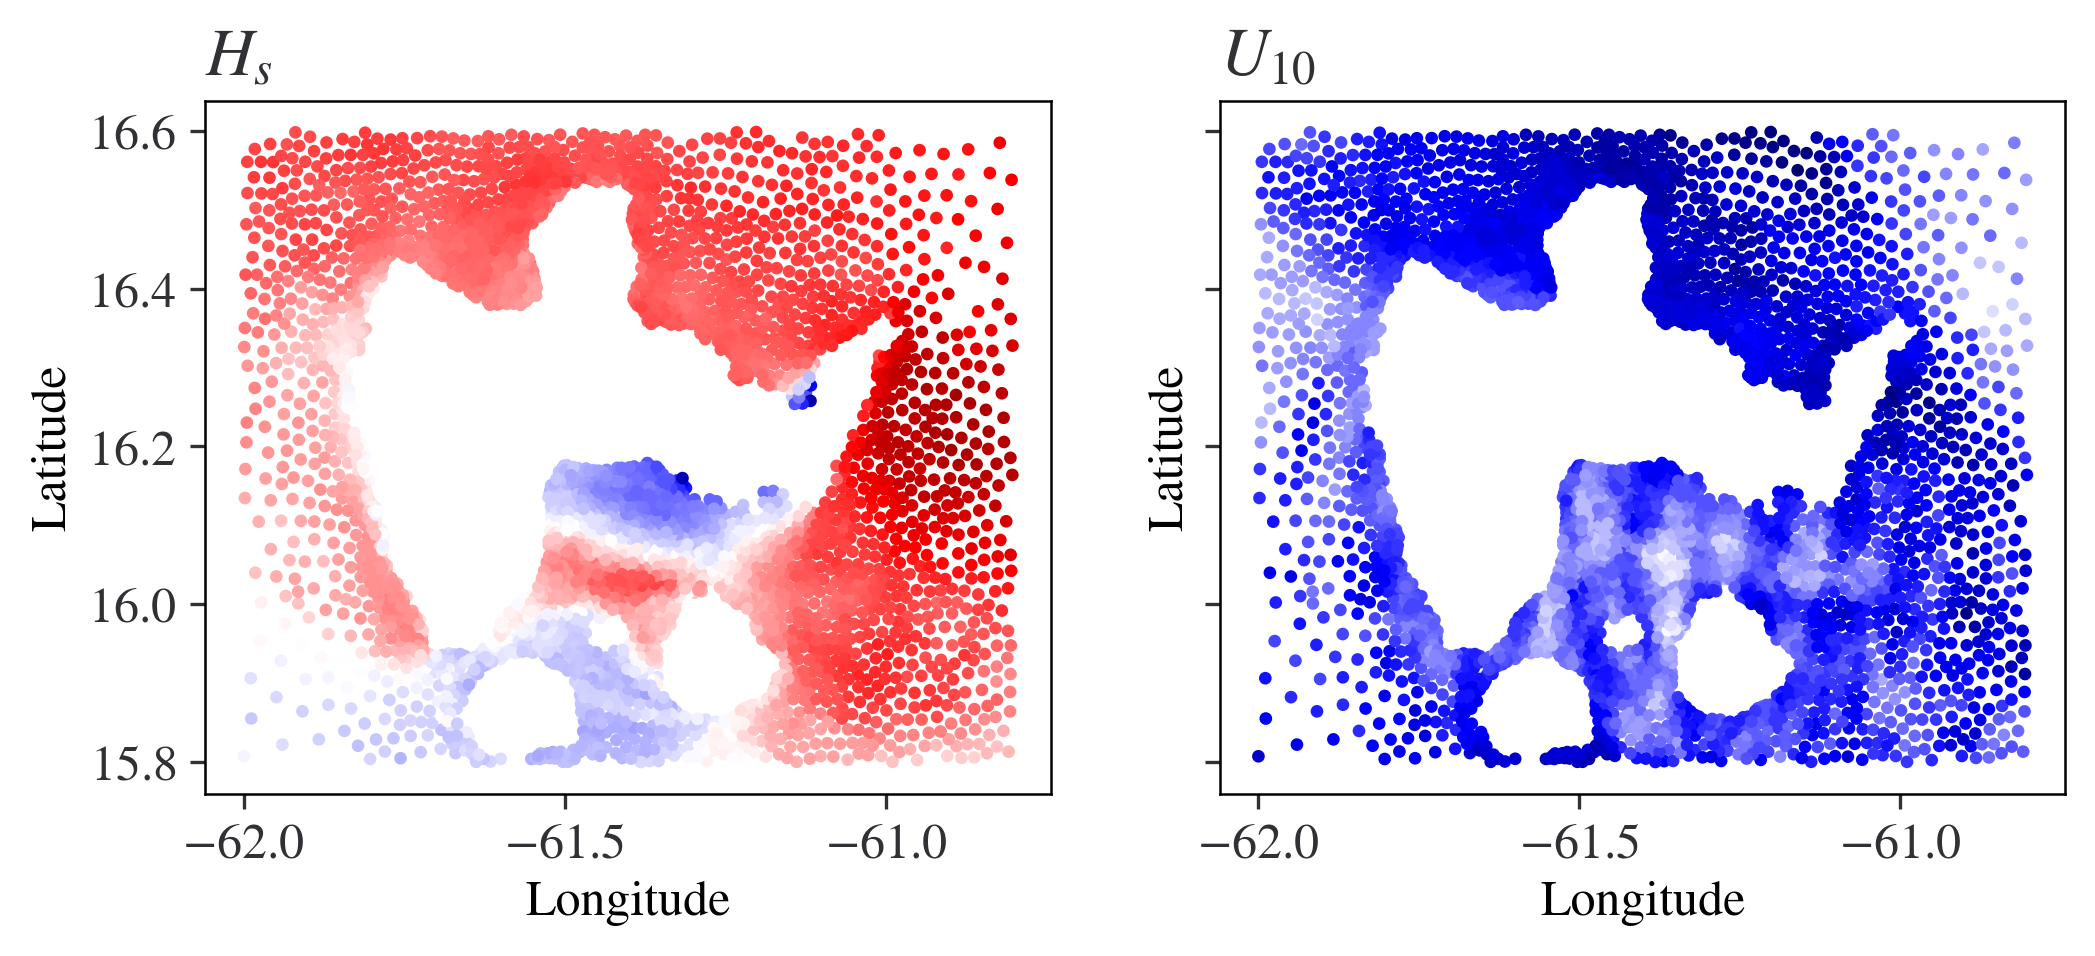

In [34]:
_ =grapher_condition.draw("Kendall_Tau_marginal_pval",draw_fig=True)
_ =grapher_condition.draw("Kendall_Tau_marginal_tval",draw_fig=True)

In [20]:
N_subsample=1000
N_year_pool=200
path_mstme_ss_dill = path_out_condition.joinpath(
    fr"mstme_ss_{N_subsample}_pool_{N_year_pool}.dill"
)
if path_mstme_ss_dill.exists():
    with open(path_mstme_ss_dill, "rb") as f:
        tm_MSTME_ss, stm_MSTME_ss = dill.load(f)

In [7]:
grapher_condition.draw("RV_STM",return_period=100,stm_MSTME_ss=stm_MSTME_ss, draw_fig=True,dir_out=None)

NameError: name 'stm_MSTME_ss' is not defined

In [8]:
mstme_condition.gp_params.shape

(2, 100, 3)

In [73]:
for vi in [0,1]:
  print(["Hs","U"][vi])
  gp_params = mstme_condition.gp_params[vi]
  # xi,mu,sigma
  mean = np.mean(gp_params,axis=0).round(3)
  stdv = np.std(gp_params,axis=0).round(3)
  lower = np.percentile(gp_params,5,axis=0)
  upper = np.percentile(gp_params,95,axis=0)
  # print("\txi,mu,sigma=")
  # print("\tMean\t",mean.round(3))
  # print("\tStDev\t",stdv.round(3))
  # print("\t 5%\t", (mean-lower).round(3))
  # print("\t95%\t", (mean-upper).round(3))
  for i in range(3):
    print(fr"{mean[i]}({stdv[i]})")


Hs
-0.355(0.126)
6.997(0.05)
4.824(0.816)
U
-0.378(0.106)
26.122(0.096)
13.357(1.97)


In [72]:
for vi in [0,1]:
  print(["Hs","U"][vi])
  cm_params = mstme_condition.params_uc[vi]
  # a,b,mu,sigma
  mean = np.mean(cm_params,axis=0).round(3)
  stdv = np.std(cm_params,axis=0).round(3)
  lower = np.percentile(cm_params,5,axis=0)
  upper = np.percentile(cm_params,95,axis=0)
  for i in range(4):
    print(fr"{mean[i]}({stdv[i]})")


Hs
0.542(0.246)
0.647(0.216)
0.513(0.311)
0.568(0.085)
U
0.601(0.219)
0.445(0.225)
0.506(0.307)
0.673(0.112)
